# <center>Решение уравнений и минимизация</center>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D 
import scienceplots
plt.style.use(['science', 'russian-font'])
from scipy.special import legendre
from scipy.optimize import fsolve
from scipy.optimize import fminbound
from scipy.signal import find_peaks

$$
    f(x) = \sum^{N}_{n=1} a_n P_{2n + 1}(x)
$$

$$
    a_n = \exp{\left(-\frac{n}{10}\right)}, \quad N = 1 , \quad x \in [-1, 1]
$$

In [2]:
N = 3
x = np.linspace(-1, 1, 500)
a_n = lambda n: np.exp(-n / 10)
def func(args: np.array, N: int) -> np.array:
    return np.sum([-1 * a_n(i) * legendre(2 * i + 1)(args) for i in range(1, N + 1)], axis = 0)

Посторим график для нахождения начальных приближений корней

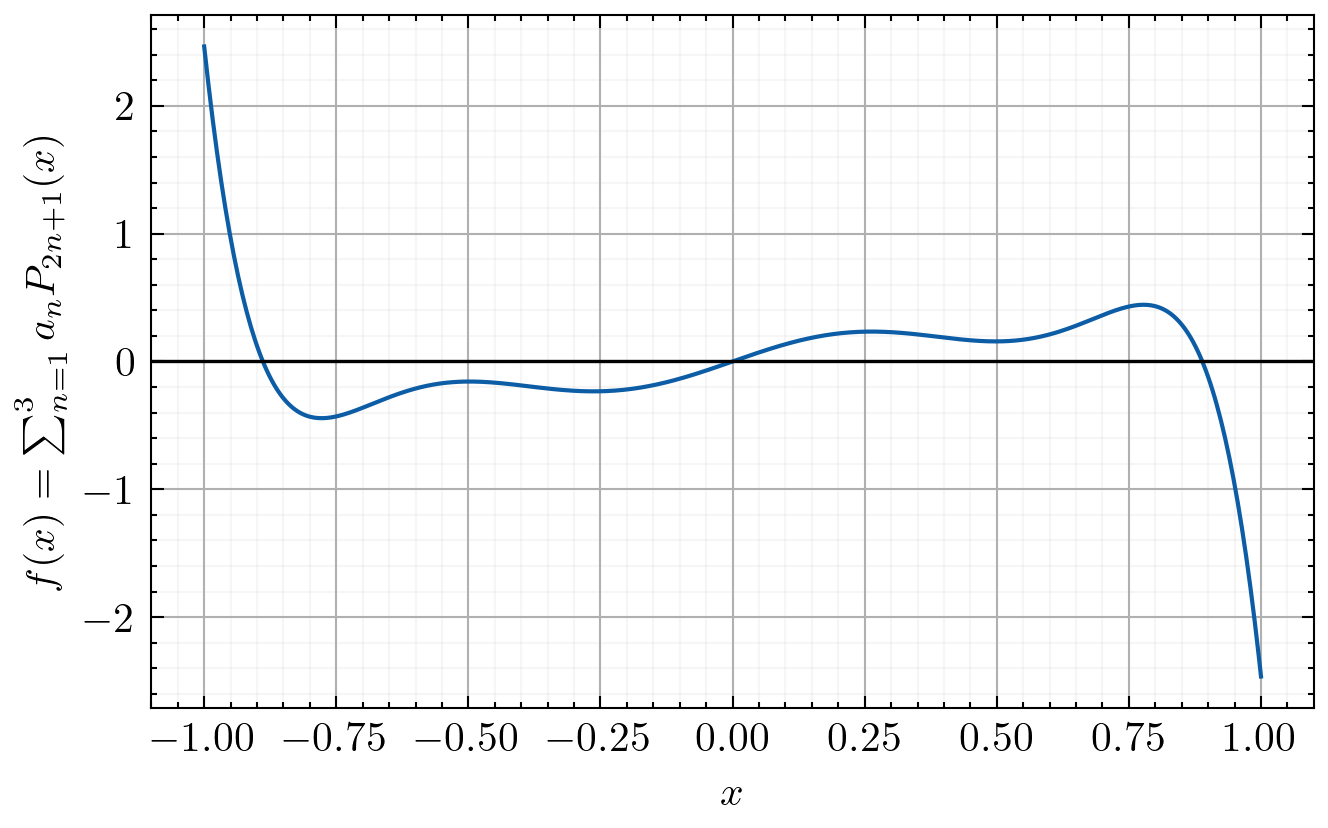

In [3]:
fig, ax = plt.subplots(1, 1, figsize = (5, 3), dpi = 300)
ax.set_xlabel("$x$")
ax.set_ylabel(r"$f(x) = \sum^{3}_{n=1} a_n P_{2n + 1}(x)$")

ax.plot(x, func(x, N))
ax.axhline(y = 0, linewidth = 0.8, color = "black")

plt.grid(True, which="major")
plt.grid(True, which="minor", alpha = 0.1)
plt.minorticks_on()

plt.show()

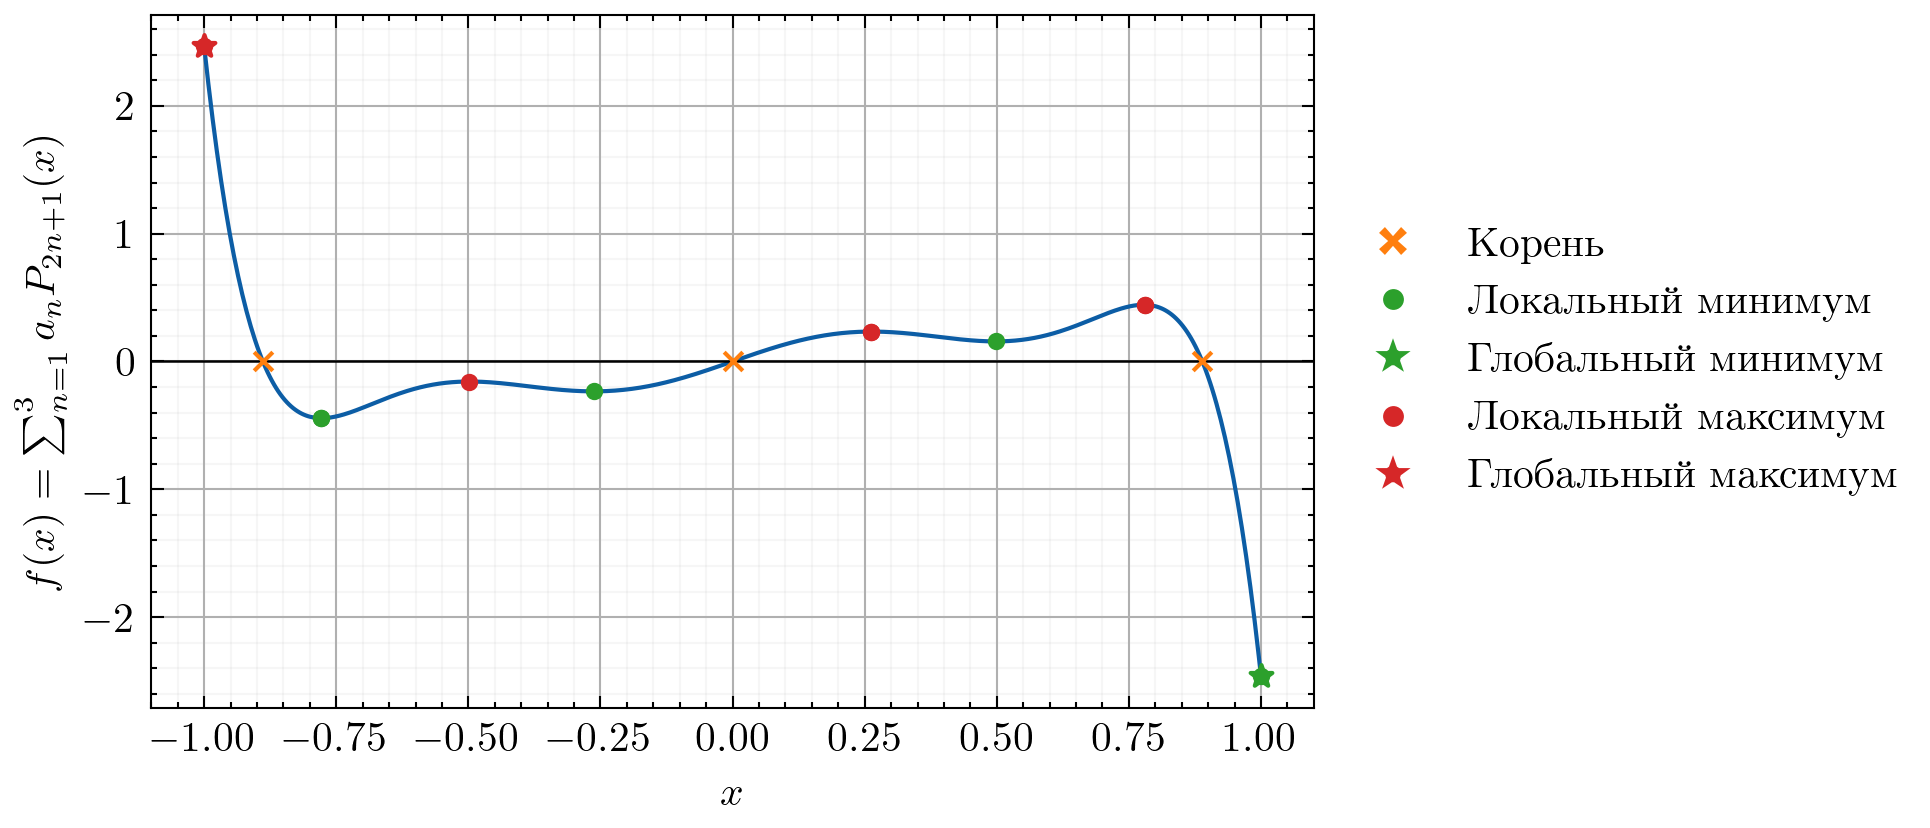

In [4]:
fig, ax = plt.subplots(1, 1, figsize = (5, 3), dpi = 300)
ax.set_xlabel("$x$")
ax.set_ylabel(r"$f(x) = \sum^{3}_{n=1} a_n P_{2n + 1}(x)$")

# Добавление сетки
plt.grid(True, which="major")
plt.grid(True, which="minor", alpha = 0.1)
plt.minorticks_on()

# Легенда
plt.legend(handles = [
    Line2D([0], [0], marker = 'X', color = 'w', label = "Корень", markerfacecolor = 'tab:orange', markersize = 8),
    Line2D([0], [0], marker = 'o', color = 'w', label = "Локальный минимум", markerfacecolor = 'tab:green'),
    Line2D([0], [0], marker = '*', color = 'w', label = "Глобальный минимум", markerfacecolor = 'tab:green', markersize= 12),
    Line2D([0], [0], marker = 'o', color = 'w', label = "Локальный максимум", markerfacecolor = 'tab:red'),
    Line2D([0], [0], marker = '*', color = 'w', label = "Глобальный максимум", markerfacecolor = 'tab:red', markersize= 12),
], bbox_to_anchor = (1, 0.5), loc = 'center left')

# Построение графика функции
ax.plot(x,func(x, N))
ax.axhline(y = 0, linewidth = 0.6, color = "black")

# Корни
roots  = []          # индексы корней
starts = [-1, 0, 1]  # координаты x начальных приближений к корням
for i in range(len(starts)):
    root = fsolve(func, starts[i], args = (N))[0]
    if np.abs(func(root, N)) < 10**-10:
        roots.append(root)
        ax.scatter(root, func(root, N), color = "tab:orange", marker = "x", s = 20, zorder = 2)

''' ГЛОБАЛЬНЫЕ ЭКСТРЕМУМЫ '''
ax.scatter(x[np.argmax(func(x, N))], np.max(func(x, N)), marker = "*", color = "tab:red", zorder = 2, s = 30)
ax.scatter(x[np.argmin(func(x, N))], np.min(func(x, N)), marker = "*", color = "tab:green", zorder = 2, s = 30)

''' ЛОКАЛЬНЫЕ ЭКСТРЕМУМЫ '''
localMax = []  # индексы локальных максимумов
localMin = []  # индексы локальных минимумов
peaks = find_peaks([np.abs(func(x_i, N)) for x_i in x], height = 0.01)[0]
peaks = np.concatenate(([0], peaks, [x.size - 1]))

# Нахождение локальных максимумов (пиков) функции |f(x)|
for peak in peaks:
    # Определим, является ли данный пик локальным максимумом или локальным минимом
    # в соответсвии со знаком выражения |f(x)| - f(x)
    if np.abs(func(x[peak], N)) - func(x[peak], N) <= 0:
        ax.scatter(x[peak], func(x[peak], N), color = "tab:red", zorder = 2, s = 10)
        localMax.append(peak)
    else:
        ax.scatter(x[peak], func(x[peak], N), color = "tab:green", zorder = 2, s = 10)
        localMin.append(peak)

# Найдем оставшиесмя локальные минимумы
for i in range(len(localMax) - 1):
    point = np.where(func(x, N) == np.min(func(x[localMax[i]:localMax[i + 1]], N)))[0][0]
    localMin.append(point)
    ax.scatter(x[point], func(x[point], N), color = "tab:green", zorder = 2, s = 10)
localMin = np.sort(list(set(localMin)))

# Найдем оставшиесмя локальные максимумы
for i in range(len(localMin) - 1):
    point = np.where(func(x, N) == np.max(func(x[localMin[i]:localMin[i + 1]], N)))[0][0]
    localMax.append(point)
    ax.scatter(x[point], func(x[point], N), color = "tab:red", zorder = 2, s = 10)
localMax = np.sort(list(set(localMax)))
    
plt.show()